In [1]:
import serial
import time
import matplotlib.pyplot as plt
import numpy as np

# Configurações da porta serial (ajuste a porta conforme necessário)
porta = 'COM14'  
baud_rate = 115200  # Mesmo baud rate que o configurado no Arduino

# Inicializa a conexão serial
try:
    arduino = serial.Serial(porta, baud_rate)
    time.sleep(2)  # Espera a conexão inicializar
    print("Conexão com o Arduino estabelecida.")
except serial.SerialException:
    print("Não foi possível conectar ao Arduino.")
    exit()

# Arrays para armazenar cada valor individual
V1 = []
V2 = []
V3 = []
V4 = []
fim=0#variavel que "para a leitura"

try:
    while fim==0:
        if arduino.in_waiting > 0:  # Verifica se há dados para ler
            dados = arduino.readline().decode('ISO-8859-1', errors='ignore').strip()  # Lê e decodifica a linha de dados
            valores = dados.split(',')  # Separa os valores por vírgula
            
            # Verifica se temos ao menos dois valores para armazenar
            if len(valores) >= 4:
                try:
                    # Converte cada valor em float antes de armazenar
                  
                    valor1 = int(valores[0])#
                    valor2 = float(valores[1])#
                    valor3 = int(valores[2])
                    valor4 = float(valores[3])#
                    
                    if valor2<100 or valor4<100:
                     V1.append(valor1)  # Armazena o primeiro valor (eixo x)_

                     V2.append(valor2)  # Armazena o segundo valor (eixo y)_
                     V3.append(valor3)  

                     V4.append(valor4)

                    #print(f"V1: {valor1}, V2: {valor2}")  # Exibe os valores recebidos
                    if valor1==400:     #<---codição final
                        fim=1#para de ler
                except ValueError:
                    print("Erro na conversão de um dos valores para float.")
except KeyboardInterrupt:
    print("\nEncerrando conexão...")
finally:
    arduino.close()
    print("Conexão encerrada.")


Conexão com o Arduino estabelecida.
Conexão encerrada.


import serial
import time
import matplotlib.pyplot as plt
import numpy as np

file_path = rf"C:\Users\madru\OneDrive\Documentos\ISEL\01-OEF3\w.csv"

with open(file_path, 'r') as f:


# Process the remaining lines
  data = [line.strip().split(';') for line in f if line.strip()]

        # Extract frequency and value data
  wl = np.array([float(line[0]) for line in data if float(line[1]) >= 0])
  wr = np.array([float(line[1]) for line in data if float(line[1]) >= 0])
  speed=np.linspace(0,400)

PLOTS

Text(0.5, 1.0, 'Gráfico de $\\omega(Escala_{velocidade})$ com as rodas no ar')

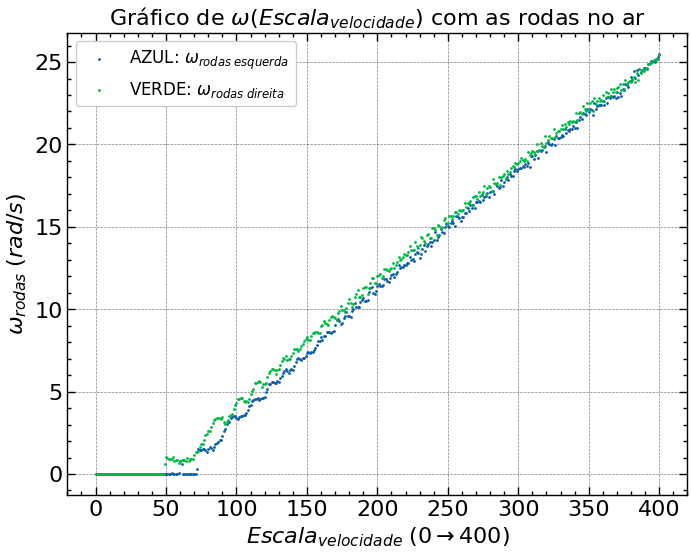

In [2]:
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

speed=np.array(V1)
wl=np.array(V2)
wr=np.array(V4)

#pl,covl=np.polyfit(speed[50:],wl[50:],1,cov=True)
#ml,bl=pl
#errosl=np.sqrt(np.diag(covl))

#pr,covr=np.polyfit(speed[45:],wr[45:],1,cov=True)
#mr,br=pr
#errosl=np.sqrt(np.diag(covl))

#wl_t=ml*np.linspace(51,400,1000)+bl
#wr_t=mr*np.linspace(46,400,1000)+br

#first_nonzerol = np.nonzero(wl)[0][0]
#first_nonzeror = np.nonzero(wr)[0][0]

#print(first_nonzerol)
#print(first_nonzeror)


#plt.plot(np.linspace(51,400,1000),wl_t,color="black",label=r"RL de $\omega_{rodas\;esquerda}$ | "+rf"${round(ml,4)}0x{round(bl,4)}$")
#plt.plot(np.linspace(51,400,1000),wr_t,color="grey",label=r"RL de $\omega_{rodas\;direita}$  | "+rf"${round(mr,4)}x{round(br,4)}$")

plt.scatter(speed,wl,s=1,label=r"AZUL: $\omega_{rodas\;esquerda}$")
plt.scatter(speed,wr,s=1,label=r"VERDE: $\omega_{rodas\;direita}$")
plt.ylabel(r'$\omega_{rodas} \; (rad/s)$')
plt.xlabel(r'$Escala_{velocidade} \; (0\rightarrow 400)$')
plt.legend(fontsize=12)
plt.title(r"Gráfico de $\omega(Escala_{velocidade})$ com as rodas no ar")